# Face Recognition with Olivetti Dataset

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import model_selection

### Load the Dataset

In [72]:
data = np.load('../data/olivetti_faces.npy')
target_data = np.load('../data/olivetti_faces_target.npy')

print(f"Data shape: {data.shape}")
print(f"The dataset has {data.shape[0]} images")
print(f"Each image has a size of {data.shape[1]}x{data.shape[2]}")

Data shape: (400, 64, 64)
The dataset has 400 images
Each image has a size of 64x64


### See how make different faces the target data have

In [73]:
print(f"The target dataset has {len(np.unique(target_data))} differents faces")
print(f"The names of the faces are {np.unique(target_data)}")
print(f"Target data shape: {target_data.shape}")

The target dataset has 40 differents faces
The names of the faces are [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Target data shape: (400,)


Reshape the target data

In [74]:
#target_data = target_data.reshape((400, 1,1)) # RESHAPE WRONG
print(f"Target data shape: {target_data.shape}")
print(target_data)
print(data)

Target data shape: (400,)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 

### Get 6 random people face from the data

[2, 29, 24, 11, 37, 38]


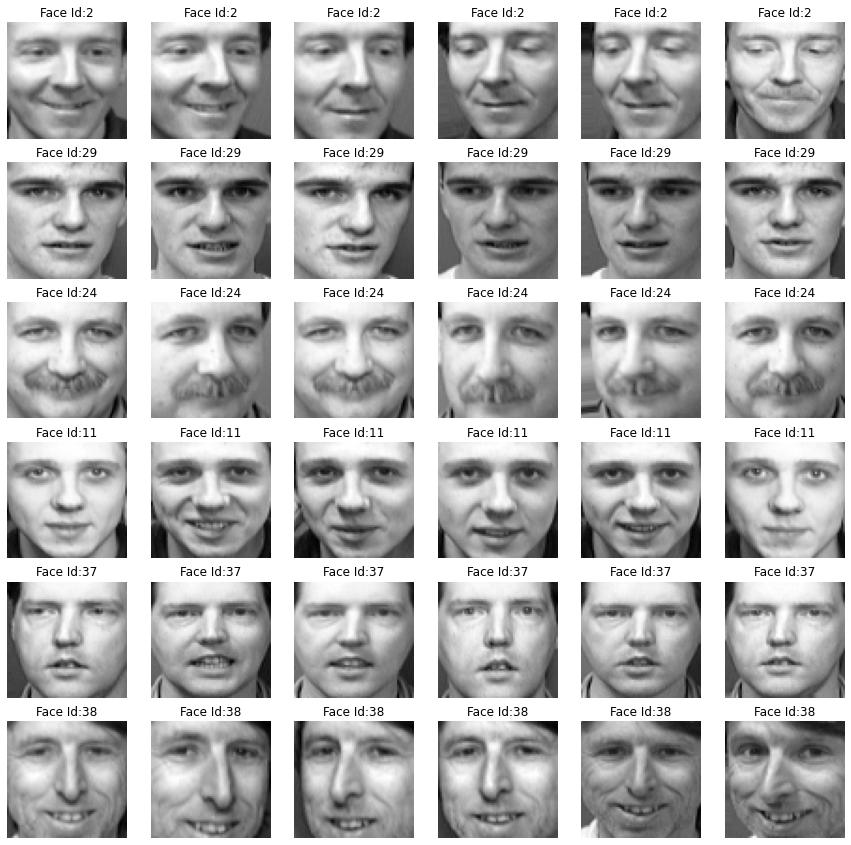

In [75]:
rows = 6
cols = 6

fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

# get 6 random different faces
face_id = random.sample(range(0,40), rows)
print(face_id)

'''
face_id = set(face_id)
while len(face_id) < rows:
    face_id.add(random.randint(0, 39))
face_id = sorted(face_id)
print(face_id)
'''

for i, face_id in enumerate(face_id):
    for j in range(cols):
        image_index=face_id * 10 + j
        ax[i,j].imshow(data[image_index], cmap="gray", aspect="auto")
        ax[i,j].set_title("Face Id:{}".format(face_id))
        ax[i,j].axis("off")

### Get all the target faces from the data

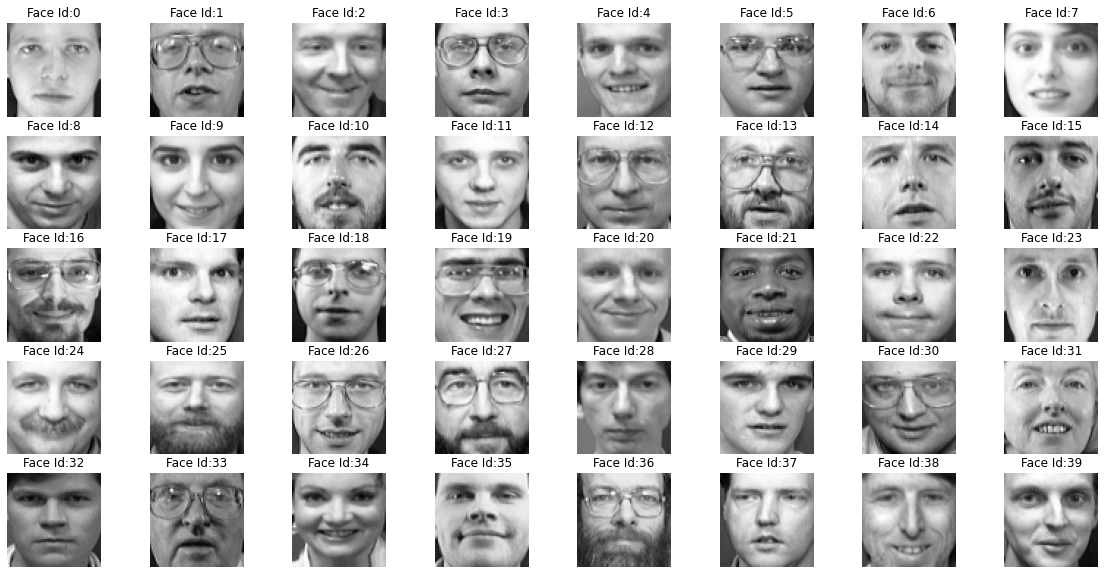

In [76]:
fig, axarr=plt.subplots(nrows=5, ncols=8, figsize=(20, 10))
axarr=axarr.flatten()

#iterating over user ids
for i in range(40):
    image_index=i * 10
    axarr[i].imshow(data[image_index], cmap="gray")
    axarr[i].set_title("Face Id:{}".format(i))
    axarr[i].axis("off")

### Get 6 random people face from the target data

In [77]:
'''
rows = 6
cols = 6

fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

face_id = random.sample(range(0,40), rows)
print(face_id)

for i, face_id in enumerate(face_id):
    for j in range(cols):
        image_index=face_id * 10 + j
        ax[i,j].imshow(target_data[image_index], cmap="gray", aspect="auto")
        ax[i,j].set_title("Face Id:{}".format(face_id))
        ax[i,j].axis("off")
'''

'\nrows = 6\ncols = 6\n\nfig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))\n\nface_id = random.sample(range(0,40), rows)\nprint(face_id)\n\nfor i, face_id in enumerate(face_id):\n    for j in range(cols):\n        image_index=face_id * 10 + j\n        ax[i,j].imshow(target_data[image_index], cmap="gray", aspect="auto")\n        ax[i,j].set_title("Face Id:{}".format(face_id))\n        ax[i,j].axis("off")\n'

Convert matrix form (image data) to a vector 

In [78]:
data = data.reshape((data.shape[0], data.shape[1] * data.shape[2]))
print(f"Data shape: {data.shape}")

Data shape: (400, 4096)


### Split Data into Train and Test

In [79]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target_data, test_size=0.2, stratify=target_data)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (320, 4096)
X_test shape: (80, 4096)
y_train shape: (320,)
y_test shape: (80,)


# Normalization

In [80]:
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
'''

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(X_train)\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)\n'

### Distribuiton of the dataset


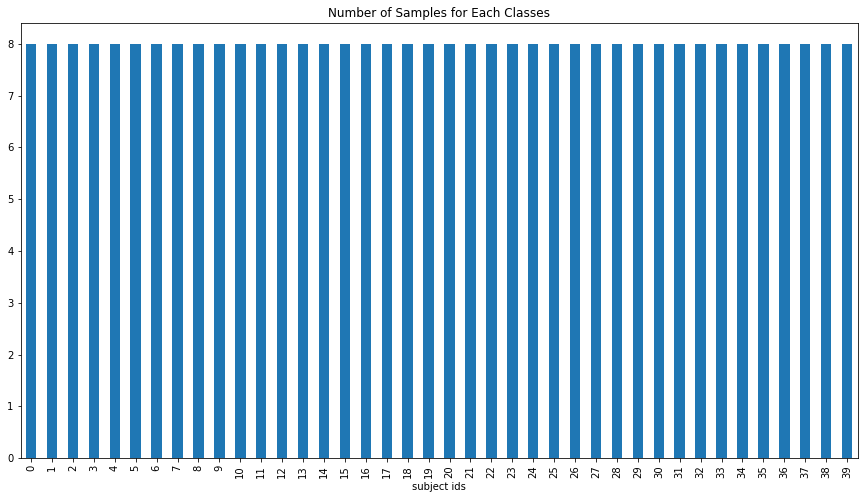

In [81]:
y_frame=pd.DataFrame()
y_frame['subject ids']= y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")
plt.show()

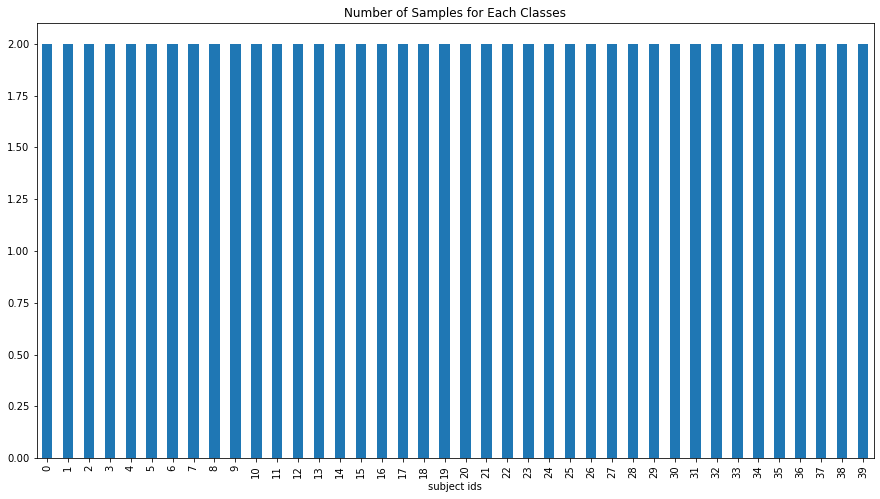

In [82]:
y_frame=pd.DataFrame()
y_frame['subject ids']= y_test
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")
plt.show()

# PCA

In [83]:
from sklearn.decomposition import PCA

In [84]:
'''
pca = PCA(n_components=2)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=i)
plt.title("PCA of the training set")
plt.legend()
plt.show()

plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=i)    
plt.title("PCA of the test set")
plt.legend()
plt.show()
'''

'\npca = PCA(n_components=2)\npca.fit(X_train)\n\nX_train_pca = pca.transform(X_train)\nX_test_pca = pca.transform(X_test)\n\nprint(f"X_train_pca shape: {X_train_pca.shape}")\nprint(f"X_test_pca shape: {X_test_pca.shape}")\n\nplt.figure(figsize=(15,8))\n\nfor i in range(40):\n    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=i)\nplt.title("PCA of the training set")\nplt.legend()\nplt.show()\n\nplt.figure(figsize=(15,8))\n\nfor i in range(40):\n    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=i)    \nplt.title("PCA of the test set")\nplt.legend()\nplt.show()\n'

Show one face

In [85]:
'''
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))

ax.imshow(pca.components_.reshape((2, 64, 64))[0], cmap="gray")
ax.set_title("First Principal Component")
ax.axis("off")
'''

'\nfig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))\n\nax.imshow(pca.components_.reshape((2, 64, 64))[0], cmap="gray")\nax.set_title("First Principal Component")\nax.axis("off")\n'

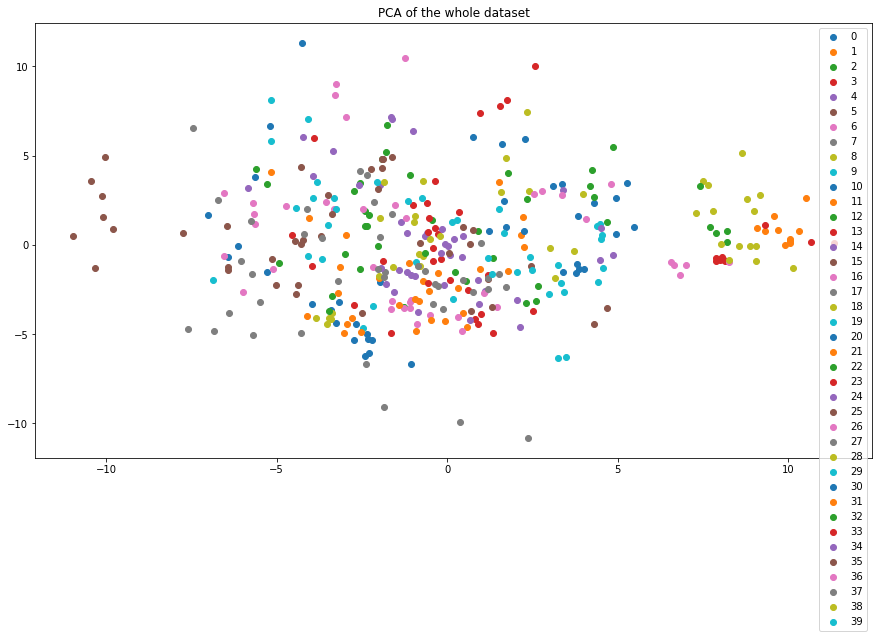

'\nfig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))\n\nax.imshow(pca.components_.reshape((2, 64, 64))[0], cmap="gray")\nax.set_title("First Principal Component")\nax.axis("off")\n'

In [86]:
pca = PCA(n_components=2)
pca.fit(data)

X_pca = pca.transform(data)

plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_pca[target_data == i, 0], X_pca[target_data == i, 1], label=i)
plt.title("PCA of the whole dataset")
plt.legend()
plt.show()

'''
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))

ax.imshow(pca.components_.reshape((2, 64, 64))[0], cmap="gray")
ax.set_title("First Principal Component")
ax.axis("off")
'''



Finding Optimum Number of Principle Component

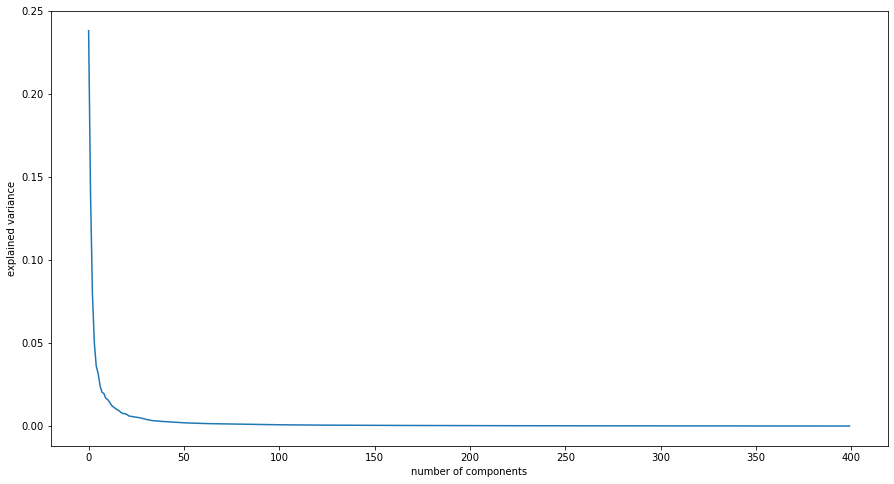

In [87]:
pca = PCA()
pca.fit(data)

plt.figure(figsize=(15,8))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()


X_train_pca shape: (320, 50)
X_test_pca shape: (80, 50)


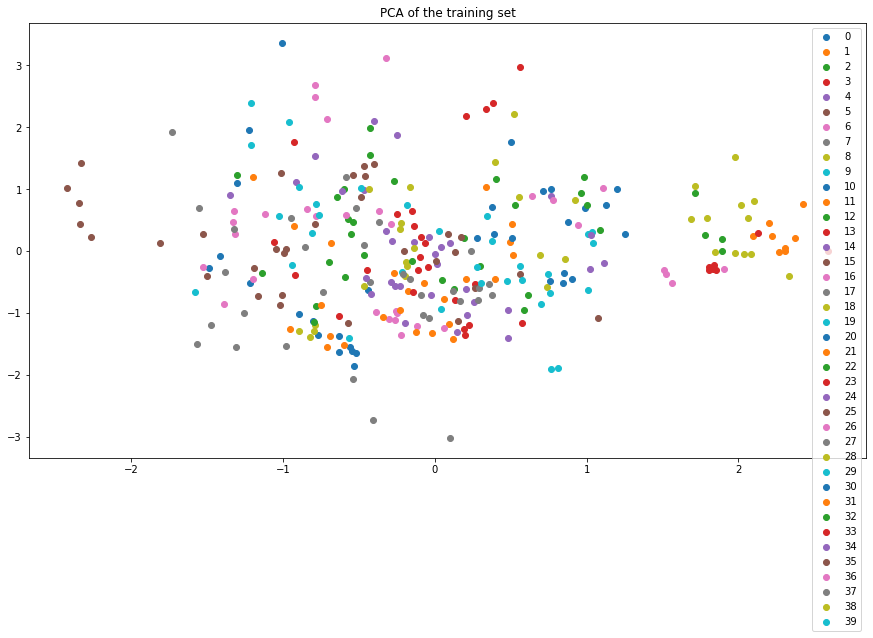

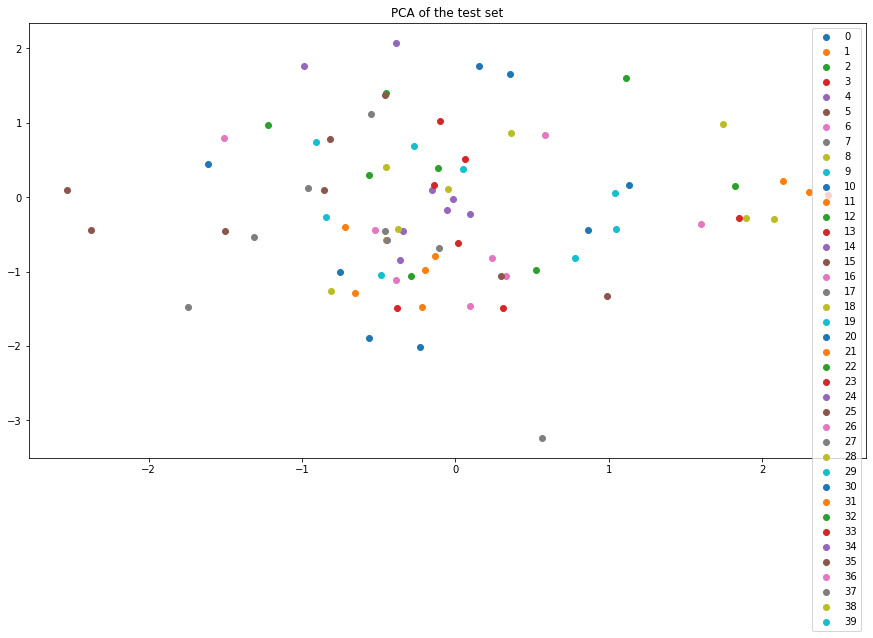

In [88]:
pca = PCA(n_components=50, whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=i)
plt.title("PCA of the training set")
plt.legend()
plt.show()

plt.figure(figsize=(15,8))

for i in range(40):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=i)
plt.title("PCA of the test set")
plt.legend()
plt.show()

Show Average Face after PCA

(-0.5, 63.5, 63.5, -0.5)

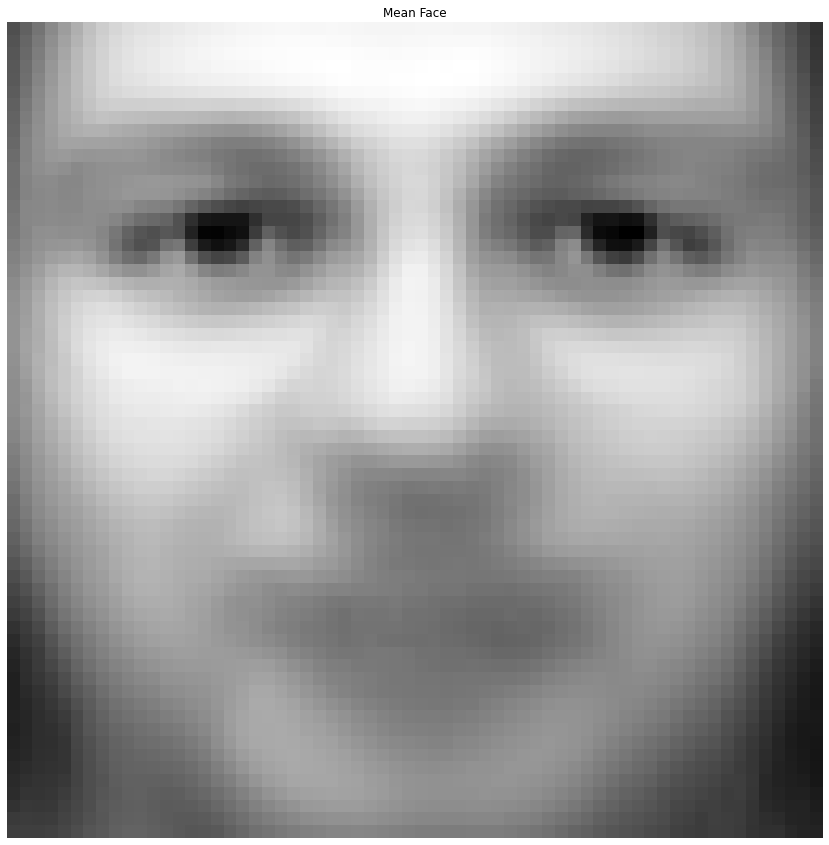

In [89]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_title("Mean Face")
ax.axis("off")

Show all faces after PCA

'\neigen_faces=pca.components_.reshape((number_of_eigenfaces, 64, 64))\nprint(number_of_eigenfaces)\nprint(eigen_faces.shape)\nprint(eigen_faces.size)\n\ncols = 10\nrows = int(number_of_eigenfaces / cols)\nfig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))\naxarr=axarr.flatten()\nfor i in range(number_of_eigenfaces):\n    print(i)\n    axarr[i].imshow(eigen_faces[i],cmap="gray")\n    axarr[i].set_title("eigen id:{}".format(i))\n'

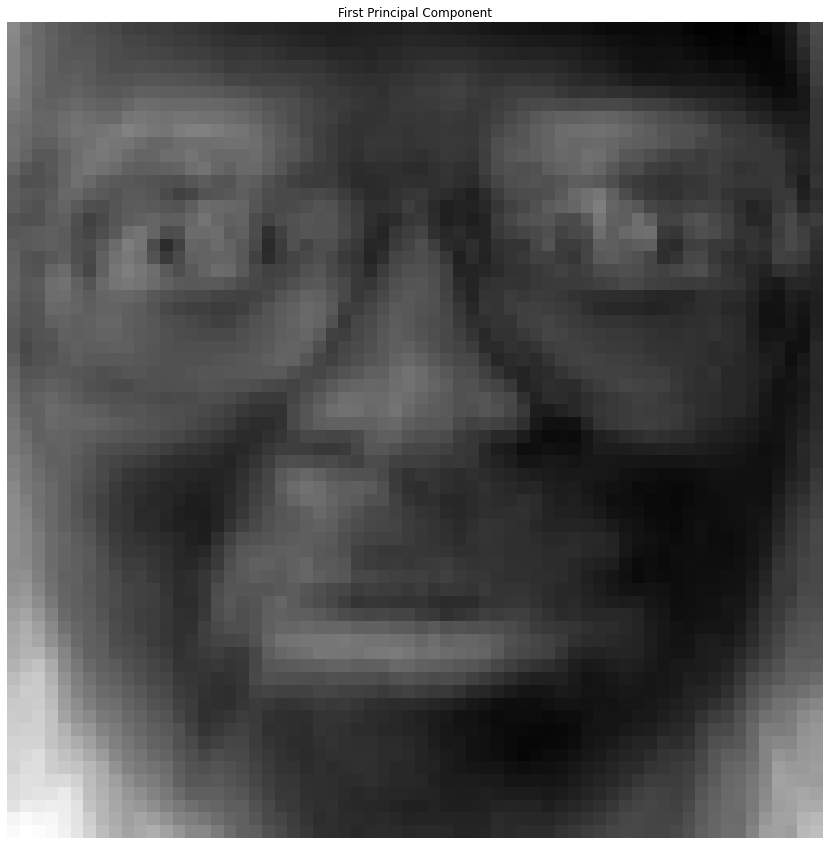

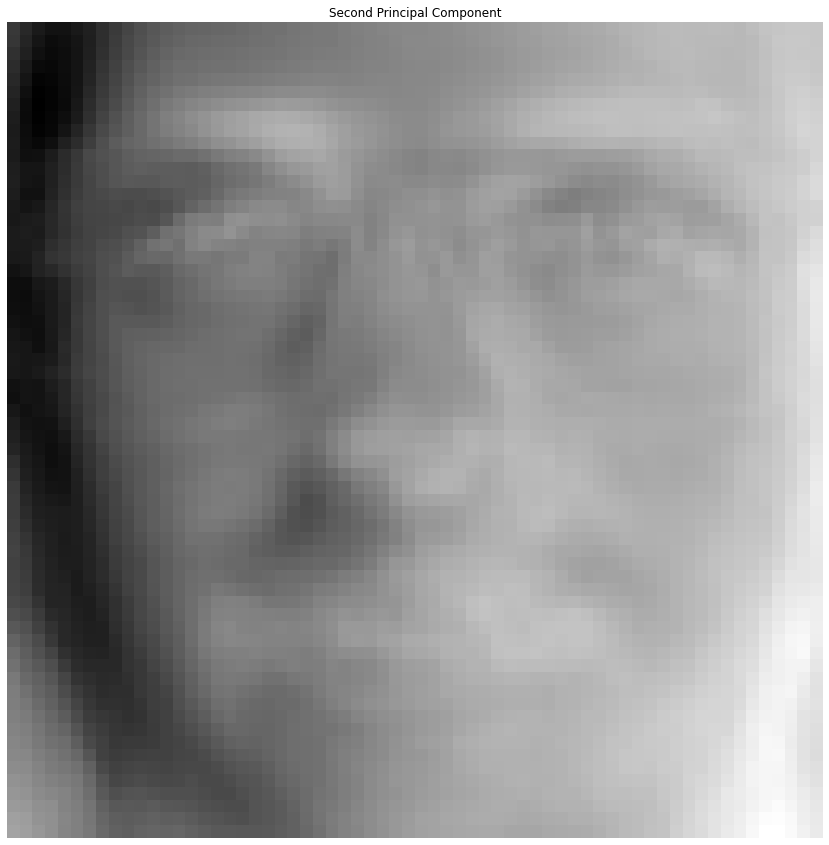

In [90]:
# show all faces after above PCA
number_of_eigenfaces=len(pca.components_)
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))

ax.imshow(pca.components_.reshape((number_of_eigenfaces, 64, 64))[0], cmap="gray")
ax.set_title("First Principal Component")
ax.axis("off")

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,15))

ax.imshow(pca.components_.reshape((number_of_eigenfaces, 64, 64))[1], cmap="gray")
ax.set_title("Second Principal Component")
ax.axis("off")

'''
eigen_faces=pca.components_.reshape((number_of_eigenfaces, 64, 64))
print(number_of_eigenfaces)
print(eigen_faces.shape)
print(eigen_faces.size)

cols = 10
rows = int(number_of_eigenfaces / cols)
fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    print(i)
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_title("eigen id:{}".format(i))
'''
